# [Linear] Mean Square Estimation
*Wiener Filter Example*

In [1]:
import numpy as np

from scipy.interpolate import UnivariateSpline
from scipy.signal import wiener, freqz
import scipy.optimize as op

import matplotlib.pyplot as plt

def ssqe(sm, theta, npts):
	return np.sqrt(np.sum(np.power(theta-sm,2)))/npts

def testWiener(x, y, theta,sigma, window, npts):
	wi = wiener(y, mysize=window, noise=sigma)
	plt.plot(x,wi)
	print('wiener error   = ', ssqe(wi, theta, npts))
	return wi

def plotPowerSpectrum(y, w):
	ft = np.fft.rfft(y)
	ps = np.real(ft*np.conj(ft))*np.square(dt)
	plt.plot(w, ps)

In [2]:
npts = 1024                 # simple size
T = np.pi                   # Time Interval of observations 
dt = T/float(npts)          # time stamp
nyf = 0.5/dt                # frequency stamp

# true value of theta
x = np.linspace(0,T,npts)
# parameter estimation
theta = np.pi*np.sign(x+1)  #  theta = const 

# measured  observations

sigma = np.mean(theta)/2       # noise power
r = np.random.normal(scale = sigma, size=(npts)) # noise
y = theta + r                  # noisy samples

wiener error   =  0.022197352836671843
theta estimate =  3.164184163295845


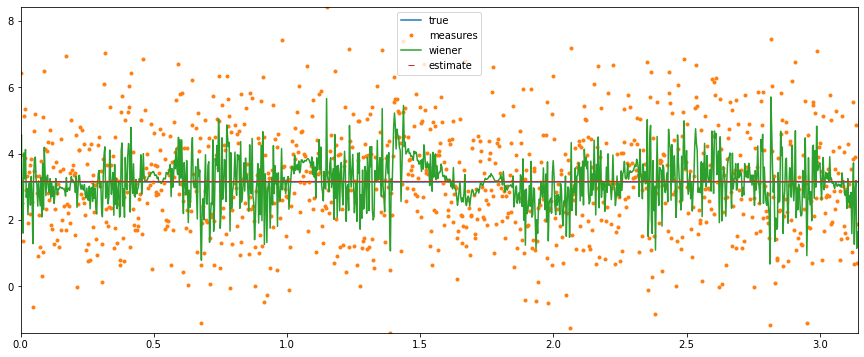

In [3]:
plt.figure(figsize=(15, 6))
plt.plot(x,theta)
plt.plot(x,y,ls='none',marker='.')
window = 32 # short time slicing window
wi = testWiener(x, y, theta, sigma, window, npts)
print('theta estimate = ',np.mean(wi))
thetaest = np.mean(wi)*np.sign(x+1) 
plt.plot(x,thetaest ,ls='none',marker="_")
plt.ylim([min(y),max(y)])
plt.xlim([0,T])
plt.legend(['true','measures', 'wiener','estimate'], loc='upper center')
plt.show()

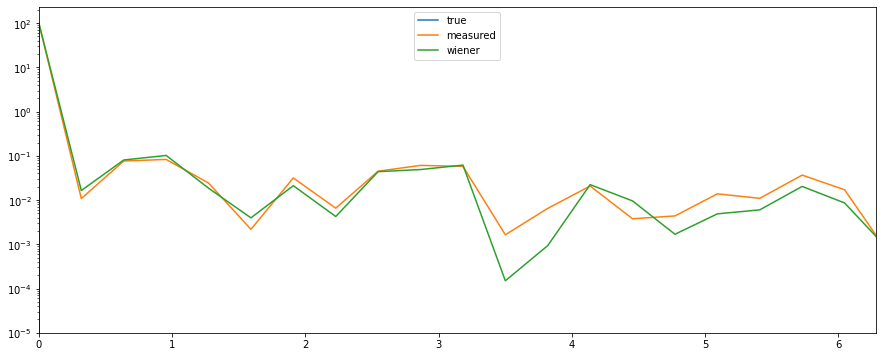

In [4]:
w = np.fft.fftfreq(npts, d=dt)
w = np.abs(w[:int(npts/2+1)]) #only freqs for real fft
plt.figure(figsize=(15, 6))
plotPowerSpectrum(theta, w)
plotPowerSpectrum(y, w)
plotPowerSpectrum(wi, w)
plt.yscale('log')
plt.xlim([0,2*T])
plt.ylim([1E-5,None])
plt.legend(['true','measured','wiener'], loc='upper center')

wiener error   =  0.0032716204800625395
theta estimate =  -0.004022148512547952


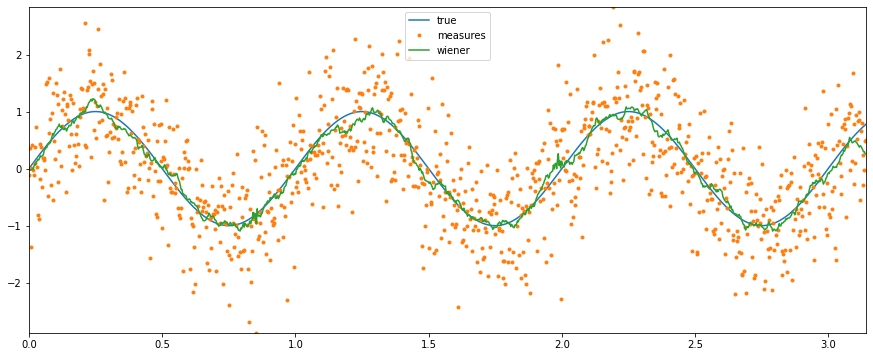

In [5]:
# signal estimation aka noise reduction

theta = np.sin(2*np.pi*x)  # theta is time variant

sigma = np.std(theta)      # noise power
r = np.random.normal(scale = sigma, size=(npts)) # noise
y = theta + r 
plt.figure(figsize=(15, 6))
plt.plot(x,theta)
plt.plot(x,y,ls='none',marker='.')
plt.ylim([min(y),max(y)])
plt.xlim([0,T])
wi = testWiener(x, y, theta, sigma, window, npts)
print('theta estimate = ',np.mean(wi))
plt.legend(['true','measures', 'wiener'], loc='upper center')


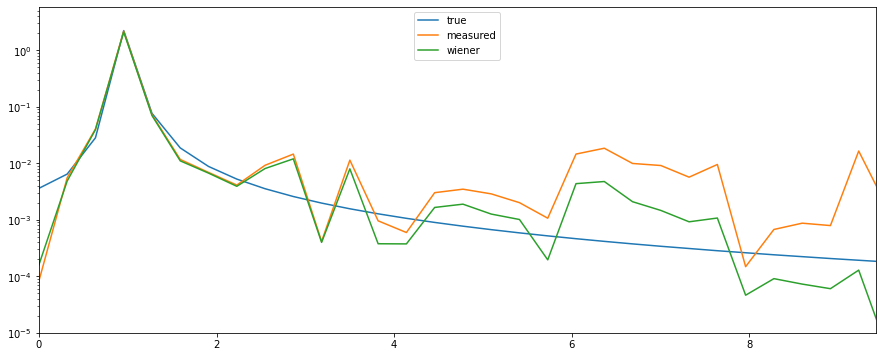

In [6]:
w = np.fft.fftfreq(npts, d=dt)
w = np.abs(w[:int(npts/2+1)]) #only freqs for real fft
plt.figure(figsize=(15, 6))
plotPowerSpectrum(theta, w)
plotPowerSpectrum(y, w)
plotPowerSpectrum(wi, w)
plt.yscale('log')
plt.xlim([0,3*T])
plt.ylim([1E-5,None])
plt.legend(['true','measured','wiener'], loc='upper center')
plt.show()